<a href="https://colab.research.google.com/github/moodv/data-analytics-portfolio/blob/main/Project2-online-retail/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading & Info On The Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('OnlineRetail.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [3]:
df.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


In [32]:
df.isnull().sum()
df.duplicated().sum()

print(f"Nulls: {df.isnull().sum()}")
print(f"Duplicates: {df.duplicated().sum()}")
df.head(20)

Nulls: InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133582
Country             0
TotalPrice          0
Year                0
Month               0
Day                 0
Weekday             0
Time                0
Hour                0
dtype: int64
Duplicates: 0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day,Weekday,Time,Hour
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,united kingdom,15.30,2010,12,1,Wednesday,08:26:00,8
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,united kingdom,20.34,2010,12,1,Wednesday,08:26:00,8
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,united kingdom,22.00,2010,12,1,Wednesday,08:26:00,8
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,united kingdom,20.34,2010,12,1,Wednesday,08:26:00,8
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,united kingdom,20.34,2010,12,1,Wednesday,08:26:00,8
5,536365,22752,set 7 babushka nesting boxes,2,2010-12-01 08:26:00,7.65,17850,united kingdom,15.30,2010,12,1,Wednesday,08:26:00,8
6,536365,21730,glass star frosted t-light holder,6,2010-12-01 08:26:00,4.25,17850,united kingdom,25.50,2010,12,1,Wednesday,08:26:00,8
7,536366,22633,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850,united kingdom,11.10,2010,12,1,Wednesday,08:28:00,8
8,536366,22632,hand warmer red polka dot,6,2010-12-01 08:28:00,1.85,17850,united kingdom,11.10,2010,12,1,Wednesday,08:28:00,8
9,536367,84879,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047,united kingdom,54.08,2010,12,1,Wednesday,08:34:00,8


# **Pre-Processing**

In [5]:
# Standardize text columns
df['Description'] = df['Description'].str.lower()
df['Country'] = df['Country'].str.lower()

# Drop nulls in Description
df = df.dropna(subset=['Description'])

# Drop exact duplicate rows
df = df.drop_duplicates()

# Convert CustomerID to integer
df['CustomerID'] = df['CustomerID'].astype('Int64')


# Add TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Ensure InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Extract date features
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Weekday'] = df['InvoiceDate'].dt.day_name()
df['Time'] = df['InvoiceDate'].dt.time
df['Hour'] = df['InvoiceDate'].dt.hour




In [6]:
df.info()
df.head()
print(f"Nulls: {df.isnull().sum()}")
print(f"Duplicates: {df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
Index: 535186 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535186 non-null  object        
 1   StockCode    535186 non-null  object        
 2   Description  535186 non-null  object        
 3   Quantity     535186 non-null  int64         
 4   InvoiceDate  535186 non-null  datetime64[ns]
 5   UnitPrice    535186 non-null  float64       
 6   CustomerID   401604 non-null  Int64         
 7   Country      535186 non-null  object        
 8   TotalPrice   535186 non-null  float64       
 9   Year         535186 non-null  int32         
 10  Month        535186 non-null  int32         
 11  Day          535186 non-null  int32         
 12  Weekday      535186 non-null  object        
 13  Time         535186 non-null  object        
 14  Hour         535186 non-null  int32         
dtypes: Int64(1), datetime64[ns](1), float64

In [7]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)
plt.rcParams['figure.figsize'] = (10,5)

# **Geographical Analysis**

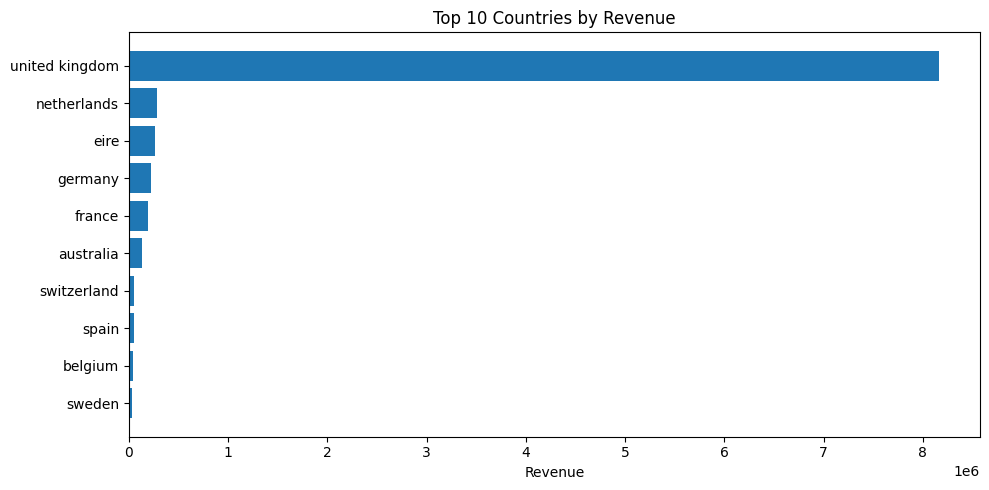

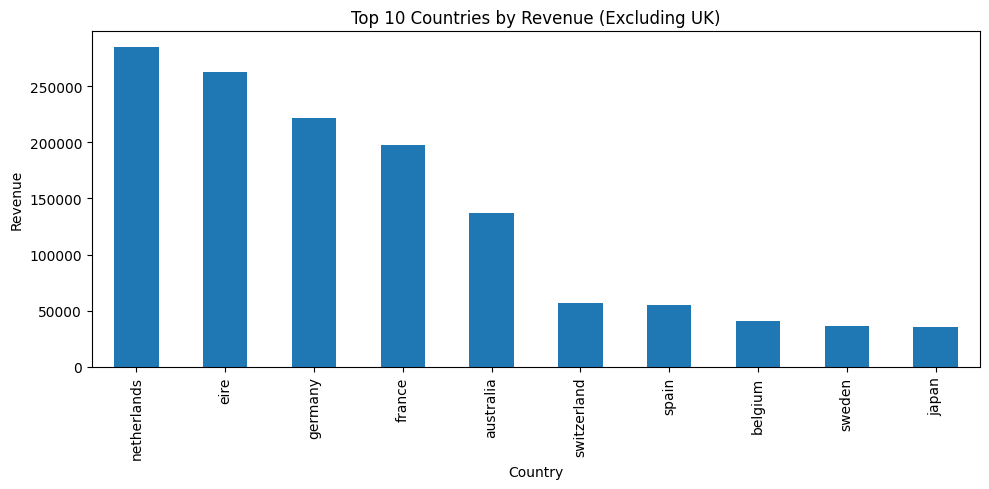

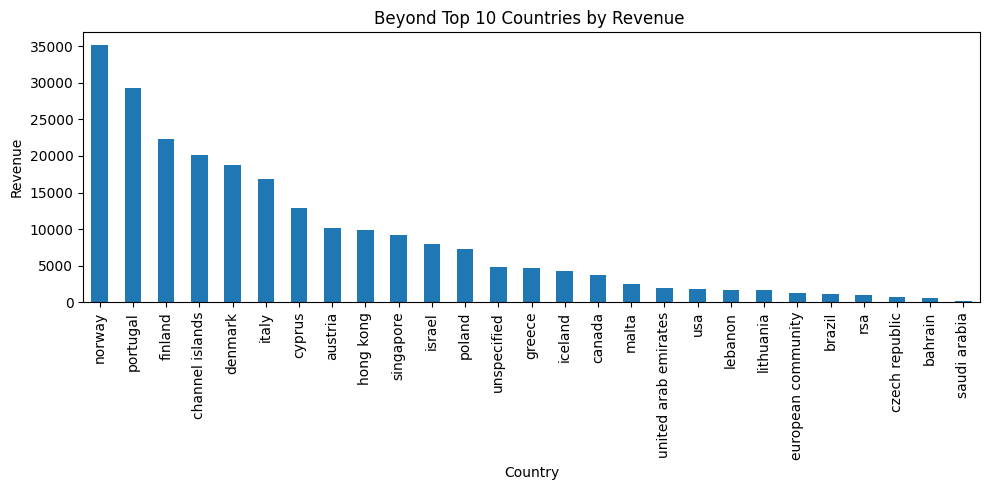

,TotalPrice
Country,
united kingdom,8167128.184


,TotalPrice
Country,
netherlands,284661.54
eire,262993.38
germany,221509.47
france,197317.11
australia,137009.77
switzerland,56363.05
spain,54756.03
belgium,40910.96
sweden,36585.41


,TotalPrice
Country,
norway,35163.46
portugal,29302.97
finland,22326.74
channel islands,20076.39
denmark,18768.14
...,...
brazil,1143.60
rsa,1002.31
czech republic,707.72


UK contribution: 83.97% of total revenue
Top 10 contribution: 13.65% of total revenue
Other countries (beyond top 10): 2.38% of total revenue


In [28]:
# top countries by revenue
countries = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# Top 10 countries
top_countries = countries.head(10)
top_countries_without_uk = countries.head(11).drop('united kingdom')
other_countries = countries.iloc[11:]

# Plot
plt.figure()
plt.barh(top_countries.index[::-1], top_countries.values[::-1])
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Revenue")
plt.tight_layout()
plt.show()

top_countries_without_uk.plot(kind='bar', figsize=(10,5), title="Top 10 Countries by Revenue (Excluding UK)")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

other_countries.plot(kind='bar', figsize=(10,5), title="Beyond Top 10 Countries by Revenue ")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

display(countries.head(1))
display(top_countries_without_uk)
display(other_countries)


# % of revenue from top country vs rest
top_share = countries.iloc[0] / countries.sum() * 100
print(f"UK contribution: {top_share:.2f}% of total revenue")

top10_share = top_countries_without_uk.sum() / countries.sum() * 100
print(f"Top 10 contribution: {top10_share:.2f}% of total revenue")

# Long tail check
other_share = other_countries.sum() / countries.sum() * 100
print(f"Other countries (beyond top 10): {other_share:.2f}% of total revenue")

# **Date & Time Analysis**

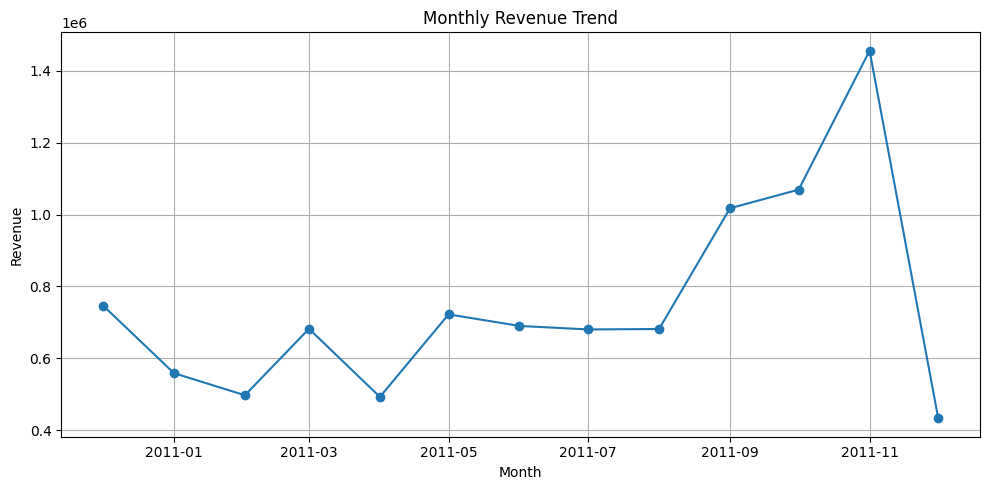

,month,revenue
0,2010-12-01,746723.610
1,2011-01-01,558448.560
2,2011-02-01,497026.410
3,2011-03-01,682013.980
4,2011-04-01,492367.841
5,2011-05-01,722094.100
6,2011-06-01,689977.230
7,2011-07-01,680156.991
8,2011-08-01,681386.460
9,2011-09-01,1017596.682


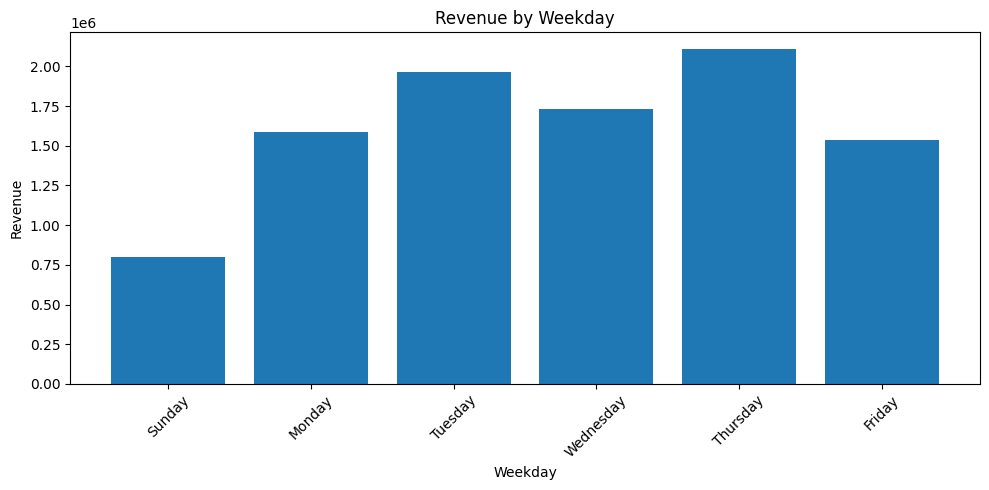

,Weekday,revenue
0,Sunday,798659.461
1,Monday,1584895.301
2,Tuesday,1965703.611
3,Wednesday,1730088.430
4,Thursday,2108701.530
5,Friday,1537958.621
6,Saturday,NaN


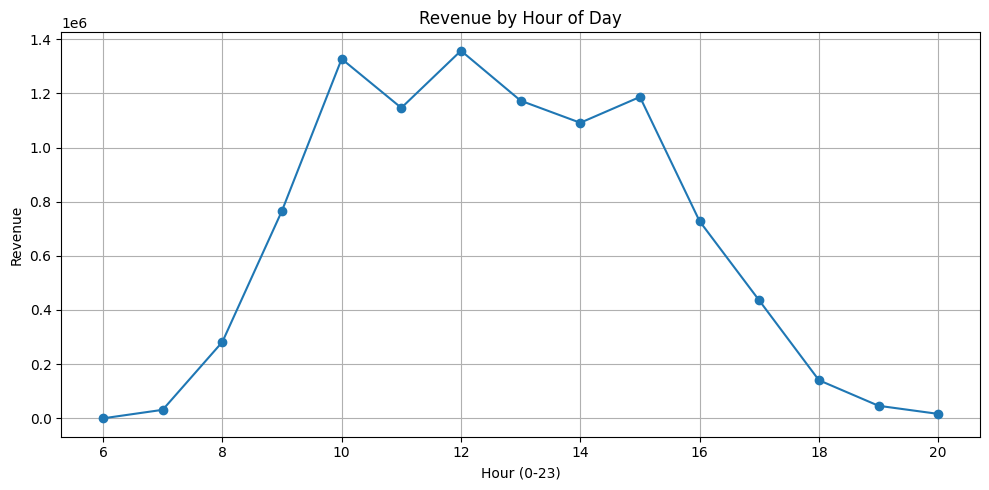

,Hour,revenue
0,6,-497.350
1,7,31009.320
2,8,281723.020
3,9,766524.171
4,10,1327329.891
5,11,1146457.490
6,12,1357595.120
7,13,1172985.870
8,14,1091408.741
9,15,1186819.410


In [31]:
# monthly revenue trend (big picture)
monthly = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum().sort_index()
monthly.index = monthly.index.to_timestamp()
plt.figure()
plt.plot(monthly.index, monthly.values, marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()
display(monthly.reset_index().rename(columns={'InvoiceDate':'month','TotalPrice':'revenue'}).head(12))


# Busy Weekdays (Saturday is OFF/ =NaN)
weekday_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
weekday = df.groupby('Weekday')['TotalPrice'].sum().reindex(weekday_order)
plt.figure()
plt.bar(weekday.index, weekday.values)
plt.title("Revenue by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
display(weekday.reset_index().rename(columns={'TotalPrice':'revenue'}))


# hourly revenue pattern
hour = df.groupby('Hour')['TotalPrice'].sum().sort_index()
plt.figure()
plt.plot(hour.index, hour.values, marker='o')
plt.title("Revenue by Hour of Day")
plt.xlabel("Hour (0-23)")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()
display(hour.reset_index().rename(columns={'TotalPrice':'revenue'}))


# **Product Analysis**

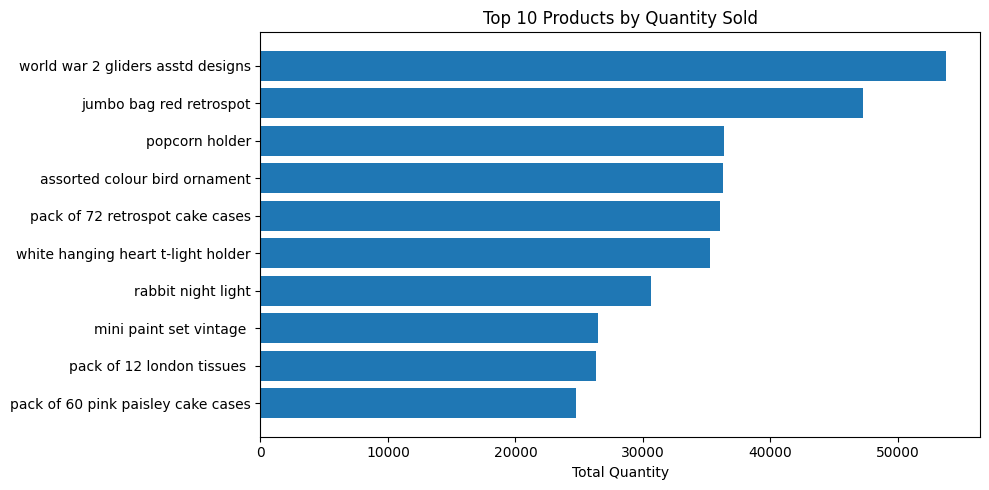

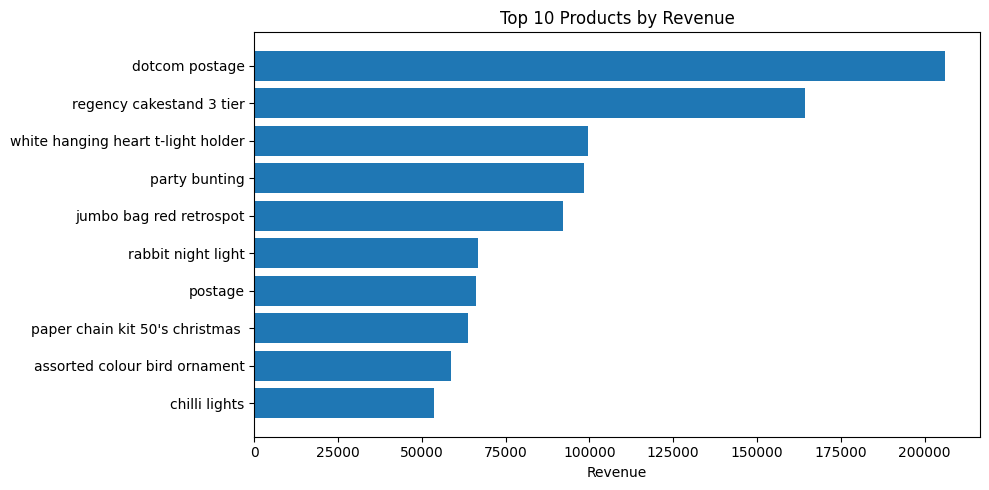

,top_qty,top_rev
Description,,
assorted colour bird ornament,36282.0,58792.42
chilli lights,,53746.66
dotcom postage,,206245.48
jumbo bag red retrospot,47260.0,92175.79
mini paint set vintage,26437.0,
pack of 12 london tissues,26299.0,
pack of 60 pink paisley cake cases,24719.0,
pack of 72 retrospot cake cases,36016.0,
paper chain kit 50's christmas,,63715.24


In [33]:
# top products by quantity and revenue
top_qty = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_rev = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure()
plt.barh(top_qty.index[::-1], top_qty.values[::-1])
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Total Quantity")
plt.tight_layout()
plt.show()

plt.figure()
plt.barh(top_rev.index[::-1], top_rev.values[::-1])
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.tight_layout()
plt.show()

display(pd.DataFrame({'top_qty': top_qty, 'top_rev': top_rev}).fillna(''))


Number of return rows: 9724


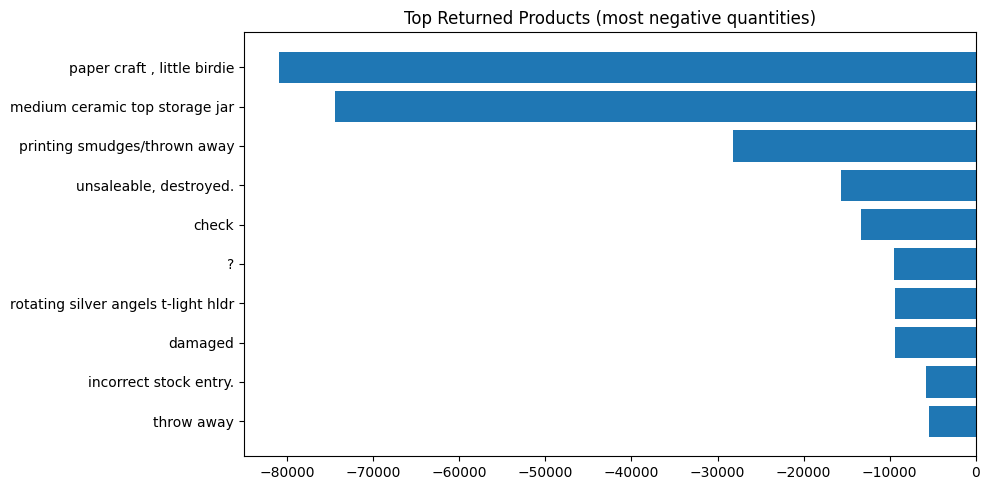

,Quantity
Description,
"paper craft , little birdie",-80995
medium ceramic top storage jar,-74494
printing smudges/thrown away,-28258
"unsaleable, destroyed.",-15644
check,-13381
?,-9496
rotating silver angels t-light hldr,-9376
damaged,-9365
incorrect stock entry.,-5760


In [34]:
# Returns: negative quantity indicates cancellations/returns
returns = df[df['Quantity'] < 0]
print("Number of return rows:", returns.shape[0])
if returns.shape[0] > 0:
    returns_by_product = returns.groupby('Description')['Quantity'].sum().sort_values().head(10)
    plt.figure()
    plt.barh(returns_by_product.index[::-1], returns_by_product.values[::-1])
    plt.title("Top Returned Products (most negative quantities)")
    plt.tight_layout()
    plt.show()
    display(returns_by_product)
else:
    print("No negative-quantity rows (returns) found.")


In [ ]:
# average basket size (items per invoice)
basket = df.groupby('InvoiceNo').agg({'Quantity':'sum', 'TotalPrice':'sum'})
avg_items = basket['Quantity'].mean()
avg_order_value = basket['TotalPrice'].mean()
print(f"Avg items per invoice: {avg_items:.2f}")
print(f"Avg order value: {avg_order_value:.2f}")

# Top big baskets
display(basket.sort_values('TotalPrice', ascending=False).head(10))


Avg items per invoice: 211.76
Avg order value: 397.87


,Quantity,TotalPrice
InvoiceNo,,
581483,80995,168469.60
541431,74215,77183.60
574941,14149,52940.94
576365,13956,50653.91
556444,60,38970.00
567423,12572,31698.16
556917,15049,22775.93
572209,1920,22206.00
567381,6760,22104.80


In [ ]:
# Pareto for customers (drop null CustomerID)
df_cust = df.dropna(subset=['CustomerID']).copy()
cust_rev = df_cust.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)
cust_cum = cust_rev.cumsum() / cust_rev.sum()
top_pct = (cust_cum <= 0.8).sum() / cust_rev.shape[0] * 100

print(f"Customers contributing to first 80% revenue: { (cust_cum <= 0.8).sum() } customers ({top_pct:.2f}% of customers)")
display(cust_rev.head(10))


Customers contributing to first 80% revenue: 1166 customers (26.67% of customers)


,TotalPrice
CustomerID,
14646.0,279489.02
18102.0,256438.49
17450.0,187322.17
14911.0,132458.73
12415.0,123725.45
14156.0,113214.59
17511.0,88125.38
16684.0,65892.08
13694.0,62690.54


In [ ]:
# Recency measured relative to max InvoiceDate in dataset
import datetime as dt
ref_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = df_cust.groupby('CustomerID').agg(
    recency = ('InvoiceDate', lambda x: (ref_date - x.max()).days),
    frequency = ('InvoiceNo', 'nunique'),
    monetary = ('TotalPrice', 'sum')
).reset_index()

display(rfm.head())


,CustomerID,recency,frequency,monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
